In [30]:
import os

In [31]:
datadir= "data/"

from https://nanonets.com/blog/how-to-extract-data-from-invoices-using-python/

In [44]:
files = os.listdir("data")

In [45]:
print(files)

['wordpress-pdf-invoice-plugin-sample.pdf_page0.png', 'szamla.pdf', 'wordpress-pdf-invoice-plugin-sample.pdf', 'page0.png']


In [35]:
file = files[1]

pdftotext

In [36]:
import pdftotext

In [37]:
with open(datadir+file, 'rb') as f:
    pdf = pdftotext.PDF(f)
    text = '\n\n'.join(pdf)
print(text)

Invoice
From:
DEMO - Sliced Invoices
Suite 5A-1204
123 Somewhere Street
Your City AZ 12345
admin@slicedinvoices.com

Invoice Number

INV-3337

Order Number

12345

Invoice Date

January 25, 2016

Due Date

January 31, 2016

Total Due

$93.50

1.00

Service
Web Design
This is a sample description...

ANZ Bank
ACC # 1234 1234
BSB # 4321 432

Pa

Hrs/Qty

id

To:
Test Business
123 Somewhere St
Melbourne, VIC 3000
test@test.com

Rate/Price

Adjust

Sub Total

$85.00

0.00%

$85.00

Sub Total

$85.00

Tax

$8.50

Total

$93.50

Payment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.
Thanks for choosing DEMO - Sliced Invoices | admin@slicedinvoices.com
Page 1/1




tabula - TEXT BASED DOCS


In [38]:
from tabula import read_pdf
from tabulate import tabulate
df = read_pdf(datadir+file ,pages="all")
print(tabulate(df[0]))
#print(tabulate(df[1]))


-  ------------  ----------------
0  Order Number  12345
1  Invoice Date  January 25, 2016
2  Due Date      January 31, 2016
3  Total Due     $93.50
-  ------------  ----------------


/Users/peterkiss/anaconda3/envs/docproc_env/lib/python3.12/site-packages/tabula/io.py:1054: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


pytesseract - https://nanonets.com/blog/ocr-with-tesseract/

In [39]:
import cv2
import pytesseract
from pytesseract import Output

brew install tesseract

brew install tesseract-lang


In [40]:
import os
from PIL import Image
from pdf2image import convert_from_path
import pytesseract

filePath = datadir+file

doc = convert_from_path(filePath)
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

for page_number, page_data in enumerate(doc):
    #txt = pytesseract.image_to_string(Image.fromarray(page_data)).encode("utf-8")
    txt = pytesseract.image_to_string(page_data, lang="hun")#.encode("utf-8")
    print("Page # {} - {}".format(str(page_number),txt))

Page # 0 - G MWredhwoices

From:
DEMO - Sliced Invoices

Invoice

Invoice Number

INV-3337

Order Number

12345

Suite 5A-1204 Invoice Date January 25, 2016
123 Somewhere Street Due Date January 31, 2016
Your City AZ 12345
admin Oslicedinvoices.com poeleee $93.50
To:
Test Business
123 Somewhere St
Melbourne, VIC 3000
estOtest.com
Hrs/aty Service Rate/Price Adjust Sub Total
Web Design jo
1.00 This is a sample description... $85.00 9.0090 $85.00
Sub Total $85.00
Tax $8.50
Total $93.50

ANZ Bank
ACC 4 1234 1234
BSB $ 4321 432

Payment is due within 30 days from date of invoice. Late payment is subject to fees of 590 per month.
Thanks for choosing DEMO - Sliced Invoices I admin Oslicedinvoices.com

Page 1/1




In [77]:

# import module
from pdf2image import convert_from_path
 
 
# Store Pdf with convert_from_path function
images = convert_from_path(filePath)
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    #images[i].save(datadir+'page'+ str(i) +'.jpg', 'JPEG')
    images[i].save(filePath.split('.')[0]+'_page'+ str(i) +'.png', 'PNG')


In [78]:
import cv2
img = cv2.imread(filePath.split('.')[0]+"_page0.png")

In [79]:
from pytesseract import Output

#txt = pytesseract.image_to_string(Image.fromarray(page_data)).encode("utf-8")
d = pytesseract.image_to_string(img, output_type=Output.DICT)#.encode("utf-8")
# Print the keys of the resulting dictionary to see the available information
print(d.keys())

dict_keys(['text'])


In [80]:
print(d['text'])

© Cicedmvoices

From:
DEMO - Sliced Invoices

Invoice

Invoice Number

INV-3337

Order Number

12345

Suite 5A-1204 Invoice Date January 25, 2016
123 Somewhere Street Due Date January 31, 2016
Your City AZ 12345
admin @slicedinvoices.com fotallpue) CERES
To:
Test Business
123 Somewhere St
Melbourne, VIC 3000
lest@test.com
Hrs/Qty Service Rate/Price Adjust Sub Total
Web Design 9
1.00 This is a sample description... $85.00 0.00% $85.00
Sub Total $85.00
Tax $8.50
Total $93.50

ANZ Bank
ACC # 1234 1234
BSB # 4321 432

Payment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.
Thanks for choosing DEMO - Sliced Invoices | admin@slicedinvoices.com

Page 1/1




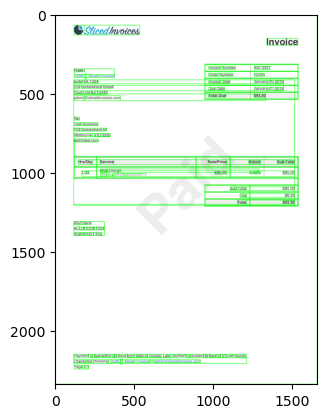

In [82]:
import matplotlib.pyplot as plt

dd = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(dd['level'])
for i in range(n_boxes):
    (x, y, w, h) = (dd['left'][i], dd['top'][i], dd['width'][i], dd['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#cv2.imshow('img', img)
#cv2.waitKey(0 )

# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [64]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [83]:
import spacy
# Load the English pre-trained model with NER
nlp = spacy.load('en_core_web_sm')

In [84]:
d['text']

'© Cicedmvoices\n\nFrom:\nDEMO - Sliced Invoices\n\nInvoice\n\nInvoice Number\n\nINV-3337\n\nOrder Number\n\n12345\n\nSuite 5A-1204 Invoice Date January 25, 2016\n123 Somewhere Street Due Date January 31, 2016\nYour City AZ 12345\nadmin @slicedinvoices.com fotallpue) CERES\nTo:\nTest Business\n123 Somewhere St\nMelbourne, VIC 3000\nlest@test.com\nHrs/Qty Service Rate/Price Adjust Sub Total\nWeb Design 9\n1.00 This is a sample description... $85.00 0.00% $85.00\nSub Total $85.00\nTax $8.50\nTotal $93.50\n\nANZ Bank\nACC # 1234 1234\nBSB # 4321 432\n\nPayment is due within 30 days from date of invoice. Late payment is subject to fees of 5% per month.\nThanks for choosing DEMO - Sliced Invoices | admin@slicedinvoices.com\n\nPage 1/1\n\n'

In [72]:
' '.join(d['text'])

'                   '

In [85]:
with open(filePath, 'r') as f:
    text = f.read()

# Apply the NER model to the invoice text
doc = nlp(d['text'])

In [94]:
for ent in doc.ents:
    print(ent,"---", ent.label_)

DEMO - Sliced Invoices

Invoice

Invoice Number

INV-3337

Order --- ORG
12345 --- DATE
January 25, 2016 --- DATE
123 --- CARDINAL
Somewhere Street Due Date --- WORK_OF_ART
January 31, 2016 --- DATE
12345 --- DATE
Test Business --- ORG
123 --- CARDINAL
Melbourne --- GPE
3000 --- CARDINAL
Hrs/Qty Service Rate/Price Adjust Sub Total
Web Design --- ORG
1.00 --- DATE
0.00% --- PERCENT
85.00 --- MONEY
Sub Total --- ORG
85.00 --- MONEY
8.50 --- MONEY
93.50 --- MONEY
ANZ Bank --- ORG
# 1234 1234 --- DATE
BSB --- ORG
# 4321 432 --- MONEY
30 days --- DATE
5% --- PERCENT
DEMO - Sliced Invoices --- ORG
1/1 --- CARDINAL


In [87]:
invoice_number = None
invoice_date = None
total_amount_due = None

for ent in doc.ents:
    if ent.label_ == 'INVOICE_NUMBER':
        invoice_number = ent.text.strip()
    elif ent.label_ == 'DATE':
        if ent.text.strip().lower().startswith('invoice'):
            invoice_date = ent.text.strip()
    elif ent.label_ == 'MONEY':
        if 'total' in ent.text.strip().lower():
            total_amount_due = ent.text.strip()

In [88]:
print('Invoice Number:', invoice_number)
print('Invoice Date:', invoice_date)
print('Total Amount Due:', total_amount_due)

Invoice Number: None
Invoice Date: None
Total Amount Due: None
